In [1]:
import pandas as pd

from sklearn import tree
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import graphviz

from sklearn import ensemble

# Decision trees


In [2]:
dataset = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dataset.data, dataset.target, test_size=0.33, random_state=3)

In [3]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [5]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       237

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



### ¿Qué sucede si probamos el modelo con los datos de Test?


In [6]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        68
           1       0.96      0.96      0.96       120

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



# Random Forest

Uno de los principales problemas de los árboles de decisión es el sobreajuste a los datos de entrenamiento. Suelen tener sesgo chico pero su varianza suele ser muy grande. La manera de sobrepasar este problema es utilizar el método de Random Forest.


Random Forest en cierto sentido promedia múltiples árboles de decisión, entrenados con distintas partes del conjunto de datos de entrenamiento, con el objetivo de reducir la varianza.

El problema de este método es que se pierde la interpretabilidad tan clara que tiene un árbol de decisión acerca de cómo el algoritmo toma la decisión de clasificación o regresión. Sin embargo, suele exponenciar la performance del modelo final.

El método utiliza el concepto de "Bagging", que se traduce literal a "embolsar", pero que refiere a tomar pequeñas muestras con remplazo del conjunto de datos original. Podemos pensar al conjunto de datos original de entrenamiento como una bolsa con elementos adentro, y lo que hacemos es tomar bolsitas de menor tamaño para realizar distintos árboles de decisión. Esto se hace secuencialmente, es decir: tomamos una bolsita, entrenamos un árbol de decisión con estos datos, luego reponemos la bolsita en la bolsa original y volvemos a tomar otra bolsita para generar otro árbol de decisión. Esto se repite $B$ veces y luego lo que se hace es promediar las probabilidades predichas por cada árbol en los $B$ árboles obtenidos (en el caso de regresión) o de fijarse cuál es la clase o nivel más votado (en el caso de clasificación).

Random forest se diferencia del método de Bagging al incorporar además la selección de un subconjunto de las variables en cada iteración. Esto evita la correlación entre los distintos árboles de decisión. Además, permite hacer una selección de variables relevantes ya que se puede obtener una importancia relativa de cada variable en la predicción. Esta mezcla de distintos modelos estadísticos y métodos de aprendizaje automático para obtener mejor performance predictiva caracteriza a los métodos llamados de ensamble o _ensemble methods_. Estamos mezclando varios modelos con tal de aumentar la capacidad predictiva del modelo global.

Como pueden ir dándose una idea, estos métodos recién pudieron ser útiles con el avance de la tecnología de las computadoras actuales. Las primeras ideas referidas a random forests fueron propuestas en 1995 y la extensión del algoritmo que se utiliza al día de hoy se patentó en 2006.


In [23]:
clf = ensemble.RandomForestClassifier(n_estimators=10, random_state=2)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2)

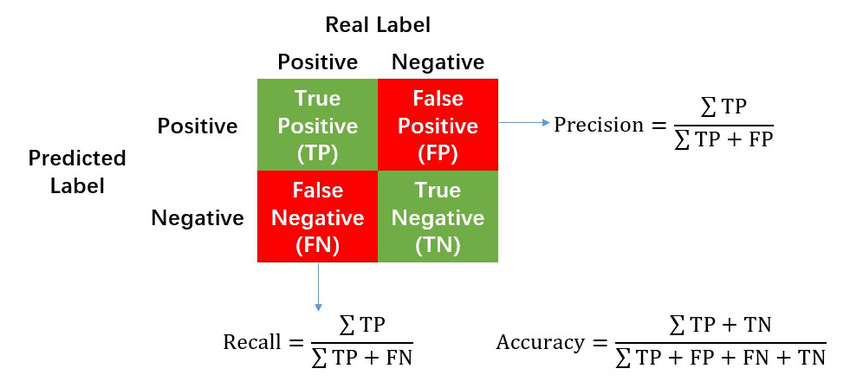

In [8]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Te%C3%B3rico/images/confusion_matrix.png', width=500)

In [24]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.97      0.97      0.97       120

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



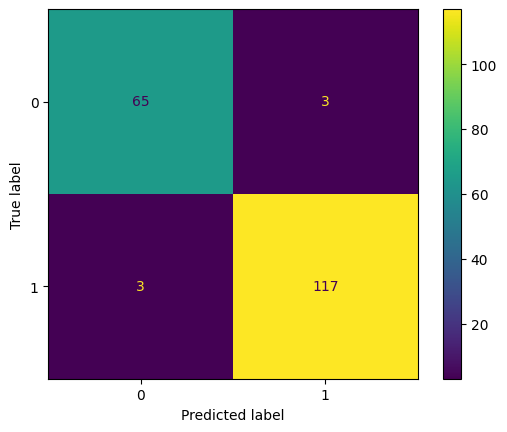

In [10]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [11]:
def draw_random_forest_tree(index):
    assert (len(clf.estimators_) > index)
    dot_data = tree.export_graphviz(clf.estimators_[index], out_file=None,
                                    feature_names=dataset.feature_names,
                                    class_names=dataset.target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

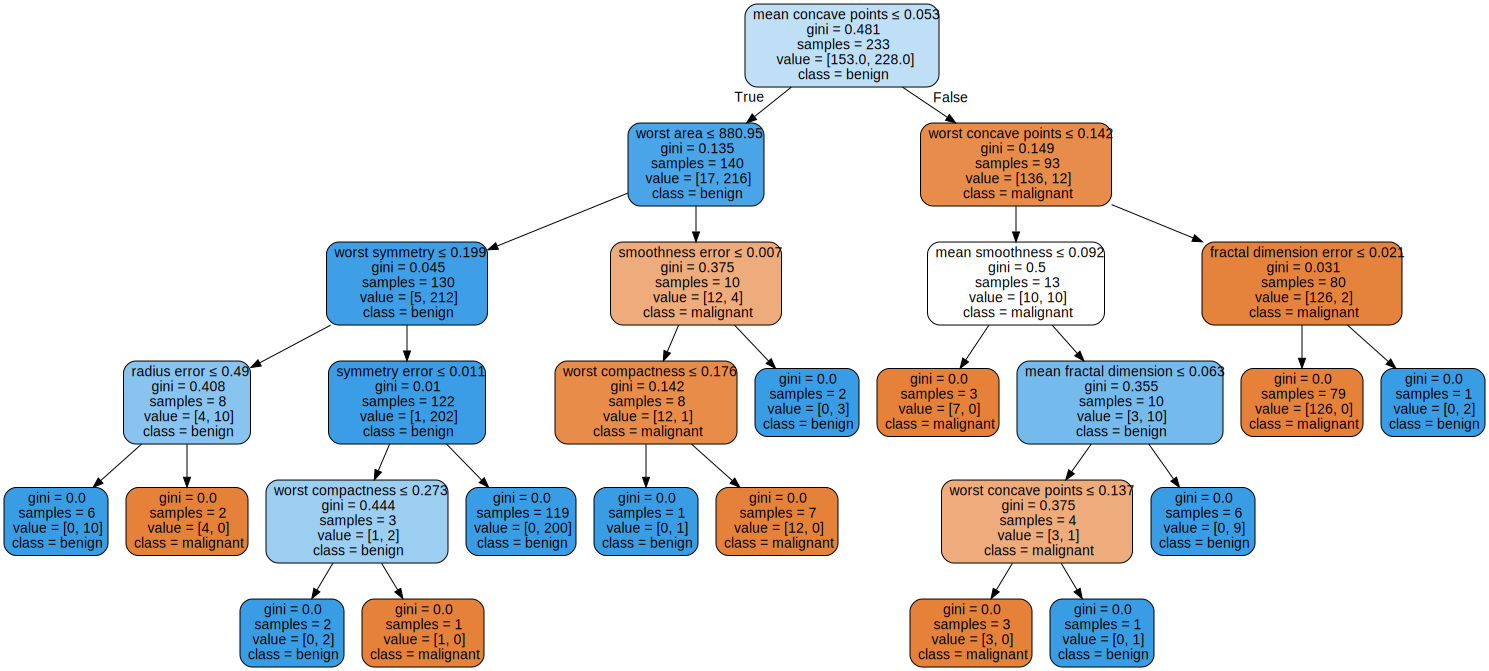

In [12]:
draw_random_forest_tree(0)

In [13]:
feature_imp = pd.Series(clf.feature_importances_,
                        index=dataset.feature_names).sort_values(ascending=False)
feature_imp[:10]

worst radius            0.178327
mean concave points     0.163674
worst concave points    0.120378
worst area              0.098519
area error              0.078066
mean radius             0.068301
mean area               0.066508
radius error            0.049172
worst perimeter         0.026183
worst concavity         0.024244
dtype: float64

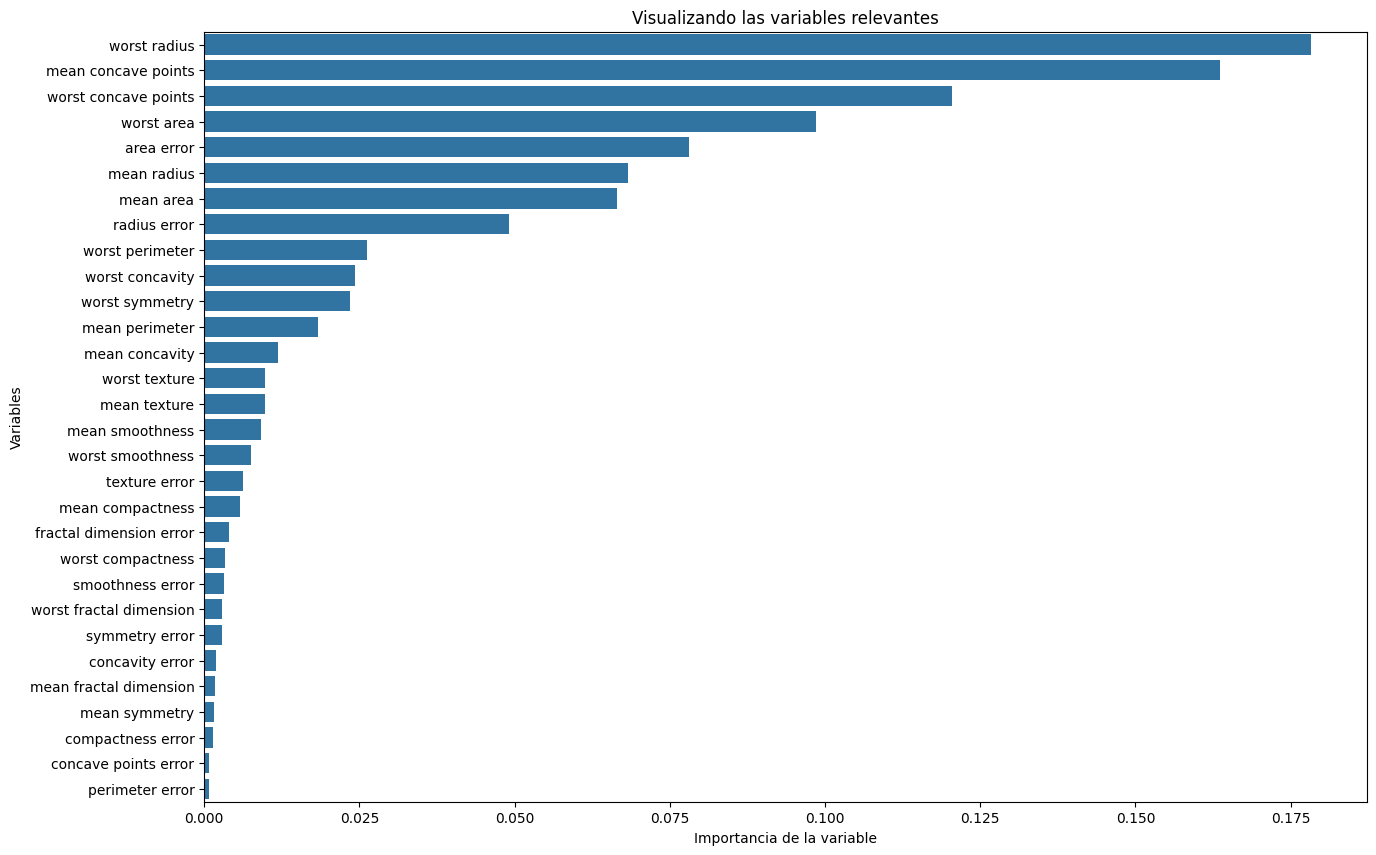

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# creamos el gráfico de barras
sns.barplot(x=feature_imp, y=feature_imp.index)
# agregamos estilo
plt.xlabel('Importancia de la variable')
plt.ylabel('Variables')
plt.title("Visualizando las variables relevantes")

# mostramos y cerramos gráfico
plt.show()

Ejemplo interesante de uso de Random Forests: https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/data


## Referencias:

- [Random forests and other randomized tree ensembles](https://scikit-learn.org/stable/modules/ensemble.html#forest)
